**PROJET 7** : Implémentez un modèle de scoring

In [1]:
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
# import 'data stack' libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# increase the maximum number of columns to display
pd.set_option("display.max_columns", 1000)  # Maximum number of columns
pd.set_option("display.max_rows", 1000)  # Maximum number of columns

In [3]:
import os
from IPython.display import display

dir_name = 'data/raw'
dict_df = {}

# Importing .csv files as pd.DataFrame
for file_name in os.listdir(dir_name):
    if file_name[-4:] == '.csv':
        file_path = os.path.join(dir_name, file_name)
        dict_df[file_name[:-4]] = pd.read_csv(file_path)

# Iterating upon DataFrames
for name, data_df in dict_df.items():

    # Displays name and head of each DataFrame
    print("\n", name, data_df.shape)
    display(data_df.head(2))


 application_test (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.066,0.059,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.059,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0



 application_train (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0



 bureau (1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN



 bureau_balance (27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C



 credit_card_balance (3840312, 23)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.00,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.08,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0



 installments_payments (13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525



 POS_CASH_balance (10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0



 previous_application (1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0



 sample_submission (48744, 2)


,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5


# **NETTOYAGE**

In [4]:
data = dict_df['application_train']
data = data.set_index('SK_ID_CURR')
data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,N

## Valeurs dupliquées

In [5]:
# %%flake8  # checking PEP8 compliance

def contains_duplicates(dataframe):
    """This function checks the presence of duplicates rows in a dataframe."""

    mask = dataframe.duplicated(keep='first')
    nb_duplicates = len(dataframe[mask])

    if nb_duplicates == 0:
        return False

    else:
        return True

1:1: E265 block comment should start with '# '
3:1: E302 expected 2 blank lines, found 1


In [6]:
contains_duplicates(data)

False

## Valeurs manquantes

In [7]:
def global_filling_rate(dataframe):
    """Compute and displays global filling rate of a DataFrame"""

    # get the numbers of rows and columns in the dataframe
    nb_rows, nb_columns = dataframe.shape
    print("DataFrame has {} rows and {} columns.".format(nb_rows, nb_columns))

    # get the number of non-Nan data in the dataframe
    nb_data = dataframe.count().sum()

    # computing the filling rate
    filling_rate = nb_data / (nb_rows * nb_columns)
    missing_rate = 1 - filling_rate

    # computing the total missing values
    missing_values = (nb_rows * nb_columns) - nb_data

    # display global results
    print("")
    print("Global filling rate of the DataFrame: {:.2%}".format(filling_rate))
    print("Missing values in the DataFrame: {} ({:.2%})"
          .format(missing_values, missing_rate))

    # compute number of rows with missing values
    mask = dataframe.isnull().any(axis=1)
    rows_w_missing_values = len(dataframe[mask])
    rows_w_missing_values_percentage = rows_w_missing_values / nb_rows

    # display results
    print("")
    print("Number of rows with missing values: {} ({:.2%})"
          .format(rows_w_missing_values, rows_w_missing_values_percentage))

    # compute number of columns with missing values
    mask = dataframe.isnull().any(axis=0)
    cols_w_missing_values = len(dataframe[dataframe.columns[mask]].columns)
    cols_w_missing_values_percentage = cols_w_missing_values / nb_columns

    # display results
    print("Number of columns with missing values: {} ({:.2%})"
          .format(cols_w_missing_values, cols_w_missing_values_percentage))

In [8]:
global_filling_rate(data)

DataFrame has 307511 rows and 121 columns.

Global filling rate of the DataFrame: 75.40%
Missing values in the DataFrame: 9152465 (24.60%)

Number of rows with missing values: 298909 (97.20%)
Number of columns with missing values: 67 (55.37%)


In [9]:
def columns_filling_rate(dataframe, columns='all', missing_only=False):
    """Calculate and displays the filling rate for
    a particular column in a pd.DataFrame."""
    
    # Importations
    import pandas as pd
    import numpy as np
    
    # If 'feature' is not specified
    if columns == 'all':
        columns = dataframe.columns
        
    
    # initialization of the results DataFrame
    results = pd.DataFrame(columns=['nb_values', 'missing_values', 'filling_rate'])
        
    # for each feature
    for column in columns:

        # Count of the values on each column
        values_count = dataframe[column].count()
        
        # Computing missing values
        nb_rows = dataframe.shape[0]
        missing_values = nb_rows - values_count

        # Computing filling rates
        filling_rate = values_count / nb_rows
        if missing_only and missing_values == 0:
            filling_rate = np.nan
        
        # Adding a row in the results' dataframe
        results.loc[column] = [values_count, missing_values, filling_rate]

    # Sorting the features by number of missing_values
    results = results.dropna(subset=['filling_rate'])
    results = results.sort_values('filling_rate')
    
    if results.empty == False:
        return results
    else:
        print("No missing value.")

4:1: W293 blank line contains whitespace
8:1: W293 blank line contains whitespace
12:1: W293 blank line contains whitespace
13:1: W293 blank line contains whitespace
14:5: E303 too many blank lines (2)
15:80: E501 line too long (83 > 79 characters)
16:1: W293 blank line contains whitespace
22:1: W293 blank line contains whitespace
31:1: W293 blank line contains whitespace
38:1: W293 blank line contains whitespace


ValueError: too many values to unpack (expected 3)

In [10]:
col_fillings = columns_filling_rate(data, columns='all', missing_only=True)
col_fillings.T

,COMMONAREA_MODE,COMMONAREA_MEDI,COMMONAREA_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_AVG,FONDKAPREMONT_MODE,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MODE,FLOORSMIN_MEDI,FLOORSMIN_AVG,FLOORSMIN_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,OWN_CAR_AGE,LANDAREA_MODE,LANDAREA_MEDI,LANDAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,BASEMENTAREA_AVG,EXT_SOURCE_1,NONLIVINGAREA_MEDI,NONLIVINGAREA_AVG,NONLIVINGAREA_MODE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,WALLSMATERIAL_MODE,APARTMENTS_MEDI,APARTMENTS_MODE,APARTMENTS_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,ENTRANCES_AVG,LIVINGAREA_MODE,LIVINGAREA_MEDI,LIVINGAREA_AVG,HOUSETYPE_MODE,FLOORSMAX_MEDI,FLOORSMAX_AVG,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MODE,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OCCUPATION_TYPE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
nb_values,92646.000000,92646.000000,92646.000000,93997.00000,93997.00000,93997.00000,97216.000000,97312.00000,97312.00000,97312.00000,98869.000000,98869.000000,98869.000000,103023.000000,103023.000000,103023.000000,104582.000000,124921.000000,124921.000000,124921.000000,127568.00000,127568.00000,127568.00000,134133.000000,137829.000000,137829.000000,137829.000000,143620.00000,143620.00000,143620.00000,151170.000000,151450.000000,151450.000000,151450.000000,152683.000000,152683.000000,152683.000000,153161.000000,153161.000000,153161.000000,153214.000000,154491.000000,154491.000000,154491.000000,157504.00000,157504.00000,157504.00000,159080.000000,161756.000000,211120.000000,246546.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,306219.000000,306490.00000,306490.00000,306490.00000,306490.00000,306851.000000,307233.000000,307499.000000,307509.000000,307510.000000
missing_values,214865.000000,214865.000000,214865.000000,213514.00000,213514.00000,213514.00000,210295.000000,210199.00000,210199.00000,210199.00000,208642.000000,208642.000000,208642.000000,204488.000000,204488.000000,204488.000000,202929.000000,182590.000000,182590.000000,182590.000000,179943.00000,179943.00000,179943.00000,173378.000000,169682.000000,169682.000000,169682.000000,163891.00000,163891.00000,163891.00000,156341.000000,156061.000000,156061.000000,156061.000000,154828.000000,154828.000000,154828.000000,154350.000000,154350.000000,154350.000000,154297.000000,153020.000000,153020.000000,153020.000000,150007.00000,150007.00000,150007.00000,148431.000000,145755.000000,96391.000000,60965.000000,41519.000000,41519.000000,41519.000000,41519.000000,41519.000000,41519.000000,1292.000000,1021.00000,1021.00000,1021.00000,1021.00000,660.000000,278.000000,12.000000,2.000000,1.000000
filling_rate,0.301277,0.301277,0.301277,0.30567,0.30567,0.30567,0.316138,0.31645,0.31645,0.31645,0.321514,0.321514,0.321514,0.335022,0.335022,0.335022,0.340092,0.406233,0.406233,0.406233,0.41484,0.41484,0.41484,0.436189,0.448208,0.448208,0.448208,0.46704,0.46704,0.46704,0.491592,0.492503,0.492503,0.492503,0.496512,0.496512,0.496512,0.498067,0.498067,0.498067,0.498239,0.502392,0.502392,0.502392,0.51219,0.51219,0.51219,0.517315,0.526017,0.686545,0.801747,0.864984,0.864984,0.864984,0.864984,0.864984,0.864984,0.995799,0.99668,0.99668,0.99668,0.99668,0.997854,0.999096,0.999961,0.999993,0.999997


In [11]:
# Dropping the columns where filling rate < 80%
# ----------------------------------------------
# creating a mask for filling rate < 80%
mask = col_fillings['filling_rate'] < 0.80
# getting the list of features
list_cols_to_delete = list(col_fillings[mask].index)
# deleting the rows
data_cleaned = data.drop(columns=list_cols_to_delete)
global_filling_rate(data_cleaned)

1:1: E265 block comment should start with '# '
2:1: E265 block comment should start with '# '
3:1: E265 block comment should start with '# '
7:1: E265 block comment should start with '# '


In [12]:
columns_filling_rate(data_cleaned, columns='all', missing_only=True)

,nb_values,missing_values,filling_rate
EXT_SOURCE_3,246546.0,60965.0,0.801747
AMT_REQ_CREDIT_BUREAU_YEAR,265992.0,41519.0,0.864984
AMT_REQ_CREDIT_BUREAU_MON,265992.0,41519.0,0.864984
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,41519.0,0.864984
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,41519.0,0.864984
AMT_REQ_CREDIT_BUREAU_HOUR,265992.0,41519.0,0.864984
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,41519.0,0.864984
NAME_TYPE_SUITE,306219.0,1292.0,0.995799
DEF_60_CNT_SOCIAL_CIRCLE,306490.0,1021.0,0.996680
OBS_60_CNT_SOCIAL_CIRCLE,306490.0,1021.0,0.996680


In [21]:
data_cleaned.head(3)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Save the file (text type)
data_cleaned.to_csv("data\cleaned\data_train.csv", index=True)

2:26: W605 invalid escape sequence '\c'
2:34: W605 invalid escape sequence '\d'


## Nettoyage des données du jeu de test

In [15]:
data_test = dict_df['application_test']
data_test_cleaned = data_test.drop(columns=list_cols_to_delete)

# Save the file (text type)
data_test_cleaned.to_csv("data\cleaned\data_test.csv", index=False)

5:31: W605 invalid escape sequence '\c'
5:39: W605 invalid escape sequence '\d'


## Transtypage des données

In [16]:
data_cleaned.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.92

# **EXPLORATION**

## Équilibre des classes

In [17]:
def categorical_distribution(dataframe, feature, ordinal=False):
    """Function plotting the bar-plot and pie-plot (as subplots) for 
    a distribution of categorical features."""
    
    # importing libraries
    import matplotlib.pyplot as plt

    # filtering non-null data for the feature
    mask = dataframe[feature].notnull()
    data_view = dataframe[mask]
    
    # Setting the data to plot
    x=data_view[feature]
    
    # Set frequencies and labels, sorting by index
    if ordinal==True:
        labels = list(x.value_counts().sort_index().index.astype(str))
        frequencies = x.value_counts().sort_index()
    else:
        labels = list(x.value_counts().sort_values(ascending=False).index.astype(str))
        frequencies = x.value_counts().sort_values(ascending=False)
    
    # Graphical properties of the main figure
    fig = plt.figure(figsize=(14, 6))
    
    plt.suptitle("Empiric statistical distribution: " + feature, fontsize=25)
    
    # Main graphical properties of the first subplot (histogram)
    ax1 = plt.subplot(121)
    ax1.set_xlabel("Values", fontsize=20)
    ax1.set_ylabel("Frequencies", fontsize=20)
    ax1.set_xticklabels(labels, rotation='45', horizontalalignment="right")

    # Main graphical properties of the second subplot (pieplot)
    ax2 = plt.subplot(122)
    ax2.set_xlabel("Relative frequencies", fontsize=20)
    
    # plotting the plots
    ax1.bar(labels, frequencies)
    ax2.pie(frequencies,
            autopct='%1.2f%%',
            shadow=True,
              )
    
    ax2.legend(labels)
    plt.show()
    return fig

2:69: W291 trailing whitespace
4:1: W293 blank line contains whitespace
11:1: W293 blank line contains whitespace
13:6: E225 missing whitespace around operator
14:1: W293 blank line contains whitespace
16:15: E225 missing whitespace around operator


ValueError: too many values to unpack (expected 3)

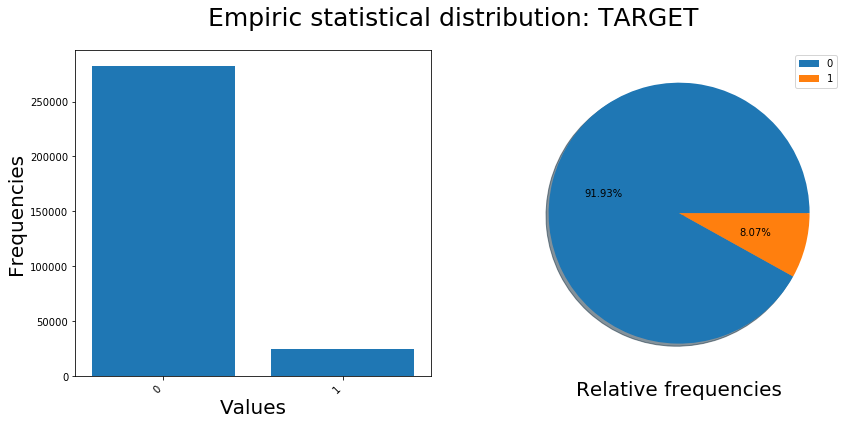

In [18]:
fig = categorical_distribution(
    data_cleaned,
    'TARGET'
)

fig.savefig('plots/imba_classes.png')

## Étude des dépendances entre variables

# **MODÉLISATION**

In [19]:
# Set random integer (seed) - 891
from random import randrange
seed = randrange(1000)
print("Seed value: ", seed)

## Équilibrage des classes

### **Sur-échantillonnage** (*upsampling*) de la classe minoritaire

In [20]:

from imblearn.over_sampling import RandomOverSampler

# Does NOT handle NaN values
print(X.isnull().any().any())

ros = RandomOverSampler(random_state=seed)
X_ros, y_ros = ros.fit_sample(X_train, y_train)


pd.Series(y_ros).value_counts()

NameError: name 'X' is not defined

In [ ]:
from sklearn.utils import resample

mask = (y == 1)
default_df = X[mask]
non_default_df = X[~mask]

df_upsample = resample(
    default_df,
    replace=True,
    n_samples=len(default_df),
    random_state=seed,
)

df2 = pd.concat([non_default_df, df_upsample])


### **Sous-échantillonnage** (*downsampling*) de la classe majoritaire

## Échantillonnage

In [ ]:
# Sampling
data_cleaned = data_cleaned.sample(n=5000, random_state=None)

## Séparation des variables explicatives et des cibles

In [ ]:
# Features' matrix
X = data_cleaned.drop(columns=["TARGET"])
display(X.head())

# Target vector
y = data_cleaned['TARGET']
y.head()

## Séparation (stratifiée) du jeu d'entraînement et du du jeu de test

In [ ]:
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(
        X,
        y,
        train_size=0.8,
        test_size=0.2,
        random_state=seed,
        stratify=y, # because classes are imbalanced
    )

## Définition du **Pipeline** incluant le pré-traitement
Nous procédons à une validation croisée pour sélectionner les hyperparamètres et le modèle.

Pour que le prétraitement soit réalisé sans fuite de données, nous utiliserons un « pipeline ».

### Définition du **prétraitement différencié** selon les colonnes

Nous appliquerons un pré-traitement différencié selon que les caractéristiques sont quantitatives ou catégorielles. Dans cette partie, nous définissons ce pré-traitement dans un pipe-line pour usage ultérieur, intégré à la validation croisée.
 * imputation
 * *target encoding*
 * standardisation

In [ ]:
global_filling_rate(X_train)
columns_filling_rate(X_train, columns='all', missing_only=True)

In [ ]:
def define_preprocessor(X):

    # Load libraries
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    from category_encoders.target_encoder import TargetEncoder
    from sklearn.preprocessing import LabelEncoder
    from sklearn.compose import ColumnTransformer
    from sklearn.impute import SimpleImputer
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer
    
    # Preprocessing pipeline for categorical features
    categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # simple imputation 
            ('target_encoder', TargetEncoder()), # target encoding
            ('scaler', StandardScaler()), # standardization after target encoding
            ])
    
    # Preprocessing pipeline for numeric features
    numeric_transformer = Pipeline(steps=[
            ('imputer', IterativeImputer(max_iter=10, random_state=seed, add_indicator=False)), # iterative imputation
            ('scaler', StandardScaler()), # standardization
             ])

    # Preprocessing column-wise using pipelines for numeric and categorical features
    preprocessor = ColumnTransformer(transformers=[
            ('cat', categorical_transformer, list(X.select_dtypes(include=['category', 'bool']).columns)),
            ('num', numeric_transformer, list(X.select_dtypes(include='number').columns)),
            ])
    
    return preprocessor

preprocessor = define_preprocessor(X)

In [ ]:
# For DEBUG purpose
preprocessor.fit_transform(X_train, y_train)

In [ ]:
X_train.shape

In [ ]:
# Dropping columns with missing values (TO FIX)


### Définition du pipe-line de production
Pour éviter les "fuites de données", nous effectuerons les transformations de prétraitement dans un "pipe-line" intégré à la recherche sur grille avec validation croisée.
Nous définissons un pipe-line incluant tout le pré-traitement avec un modèle de regression naïf.

**Remarque :** les véritables modèles seront définis dans les espaces de recherche.

In [ ]:
from sklearn.dummy import DummyClassifier
from tempfile import mkdtemp

# Create temp directory for caching transformers: avoid repeated computation
cachedir = mkdtemp()

def define_pipeline(preprocessor, classifier):

    # Load libraries
    from sklearn.pipeline import Pipeline

    # Create a pipeline
    pipe = Pipeline([("preprocess", preprocessor), # preprocessing steps
                     ("classifier", classifier), # classification step
                    ],
                    memory=cachedir, # caching for computing optimization
    )
    
    # Return pipeline
    return pipe

pipe = define_pipeline(
    preprocessor,
    DummyClassifier(strategy='stratified', random_state=seed)
)

## Création d'un modèle naïf (*baseline*)

In [ ]:
# Testing pipeline and making the naïve baseline model
model = pipe.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Score of the naïve model: mean accuracy = {:.3f}".format(score))

### Choix de la **métrique**


In [ ]:
# Setting evaluation metric for regression
scoring='roc_auc'

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names = ['non default', 'default']))

In [ ]:
from sklearn.metrics import roc_auc_score

y_test_pred = model.predict(X_test)
score_test = roc_auc_score(y_test, y_test_pred)

print(score_test)

## Définition des **espaces de recherche**


In [ ]:
# Grid of research for logistic regression
from sklearn.linear_model import LogisticRegression
# from scipy.stats import uniform  # uniform distr between 0 and 1
# np.logspace(-3, 1, 5)

# Create space of candidate values for hyperparameters
param_grid_logistic = [{
    "classifier": [LogisticRegression()],
    "classifier__penalty": ['l2', 'none'], # penalty intensity (5 values between 10⁻³ and 10¹)
    "classifier__C": np.logspace(-3, 3, 7), # penalty strength parameter
    "classifier__solver": ['lbfgs'], # try 'sag' for very large data
    "classifier__class_weight": ['balanced'], # to handle imbalanced class
}]

In [ ]:
# Dictionnary of search spaces for each family of models
param_grids = {
    'Logistic': param_grid_logistic, # space of search for logistic regression
}

## Définition du générateur de validation croisée (interne)

In [ ]:
from sklearn.model_selection import KFold

# Define the cross-validation generator
cv_inner = KFold(
    n_splits=10, # number of folds (default=5)
    shuffle=True, # shuffle the data before splitting into batche
    random_state=seed, # seeding the random number generator for shuffling
)

## Instanciations des objets RandomizedSearchCV

In [ ]:
def random_searchCV(features, target, pipe):

    # Load libraries
    from sklearn.model_selection import RandomizedSearchCV

    # Initialising the dict of results of RandomizedSearchCV
    CVsearch_dict = {}

    # Iterating over models and related parameters grids
    for model, param_grid in param_grids.items():
        print("\nProceeding RandomizedSearchCV for {}…".format(model))
        # Handle case where there are different dicts in param_grid (k-SVR…)
        for param_grid_dict in param_grid:

            # Intenciation of RandomizedSearchCV object
            randomsearch = RandomizedSearchCV(
                pipe, # use of the pipeline (preprocessing + classification)
                param_distributions=param_grid_dict, # choice of models and hyper-parameters to test
                scoring=scoring, # scoring method for classification
                cv=cv_inner, # cross-validation generator
                n_jobs=-1, # use all available cores (parallelization)
                iid=False, # to avoid a DeprecationWarning
                return_train_score=True, # to avoid a DeprecationWarning
                n_iter=10, # number of combinations of hyper-parameters to try
            )

            # Searching for best hyper-parameters, and saving in dict
            CVsearch_dict[model] = randomsearch.fit(features, target)

            # Getting standard deviation for best_model scores
            best_index = randomsearch.best_index_
            std_score = randomsearch.cv_results_['std_test_score'][best_index]

            # Displays the parameters of the best model
            print("Best parameters found for {}:".format(model))

            # Getting parameters from param_grid
            for parameter, _ in param_grid_dict.items():
                if parameter != 'classifier':
                    best_parameter = randomsearch.best_estimator_.get_params()[parameter]
                    parameter = parameter.split("classifier__")[1]   
                    # Display best parameter
                    print("  - " + parameter + ":", best_parameter)

            # Getting the best score
            print("\nMean cross-validated score of the best estimator for {}: AUC = {:.3f} ± {:.3f}".format(model, randomsearch.best_score_, std_score))
    
    # Returns dictionnary with results
    return CVsearch_dict

## **Exécution** de la recherche

In [ ]:
CVsearch_dict = random_searchCV(X_train, y_train, pipe)

## **Récupération** du meilleur modèle (pipeline : pré-traitement + régresseur)

In [ ]:
def get_best_model(CVsearch_dict):
    """Return the best_model from CVsearch_dict."""

    # Initializing best score
    best_score = 0

    # Iterating over models
    for model, model_CVsearch in CVsearch_dict.items():

        # Selecting model with best score
        if model_CVsearch.best_score_ > best_score:
            # Updating best_score and best_model
            best_model_name = model
            best_score = model_CVsearch.best_score_
            best_model = model_CVsearch.best_estimator_

    # Display results
    print("\nThe overall best cross-validated score is : AUC = {:.3f}".format(best_score))
    print("The best model is {} with parameters: ".format(best_model_name))

    # Getting parameters from param_grid
    for parameter, _ in param_grids[best_model_name][0].items():
        if parameter != 'classifier':
            best_parameter = best_model.get_params()[parameter]

            # Display best parameter
            parameter = parameter.split("classifier__")[1]
            print("  - " + parameter + ":", best_parameter)

    return best_model

model = get_best_model(CVsearch_dict)

## Hyperopt

In [ ]:
from hpsklearn import HyperoptEstimator, any_classifier, any_preprocessing
from sklearn.datasets import load_iris
from hyperopt import tpe
import numpy as np

# Download the data and split into training and test sets
iris = load_iris()

X = iris.data
y = iris.target

test_size = int(0.2 * len(y))
np.random.seed(13)
indices = np.random.permutation(len(X))
X_train = X[indices[:-test_size]]
y_train = y[indices[:-test_size]]
X_test = X[indices[-test_size:]]
y_test = y[indices[-test_size:]]

# Instantiate a HyperoptEstimator with the search space and number of evaluations
estim = HyperoptEstimator(classifier=any_classifier('my_clf'),
                          preprocessing=any_preprocessing('my_pre'),
                          algo=tpe.suggest,
                          max_evals=100,
                          trial_timeout=120)

# Search the hyperparameter space based on the data
estim.fit(X_train, y_train)

# Show the results
print(estim.score(X_test, y_test)) # 1.0

# Print the best model
print(estim.best_model())

In [ ]:
from hpsklearn import HyperoptEstimator, extra_trees
from sklearn.datasets import fetch_openml
from hyperopt import tpe
import numpy as np

# Download the data and split into training and test sets
digits = fetch_mldata('MNIST original')

X = digits.data
y = digits.target

test_size = int(0.2 * len(y))
np.random.seed(13)
indices = np.random.permutation(len(X))
X_train = X[indices[:-test_size]]
y_train = y[indices[:-test_size]]
X_test = X[indices[-test_size:]]
y_test = y[indices[-test_size:]]

# Instantiate a HyperoptEstimator with the search space and number of evaluations
estim = HyperoptEstimator(classifier=extra_trees('my_clf'),
                          preprocessing=[],
                          algo=tpe.suggest,
                          max_evals=10,
                          trial_timeout=300)

# Search the hyperparameter space based on the data
estim.fit(X_train, y_train)

# Show the results
print(estim.score(X_test, y_test))
# 0.962785714286 

print(estim.best_model())
# {'learner': ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='entropy',
#           max_depth=None, max_features=0.959202875857,
#           max_leaf_nodes=None, min_impurity_decrease=0.0,
#           min_impurity_split=None, min_samples_leaf=1,
#           min_samples_split=2, min_weight_fraction_leaf=0.0,
#           n_estimators=20, n_jobs=1, oob_score=False, random_state=3,
#           verbose=False, warm_start=False), 'preprocs': (), 'ex_preprocs': ()}

# **Analyse** des résultats

## **Évaluation finale** du meilleur modèle sur le jeu de test

In [ ]:
from sklearn.metrics import roc_auc_score

y_train_probas = model.predict_proba(X_train)[:,1] # get probas for positive label
score_train = roc_auc_score(y_train, y_train_probas)
print("Score of the best model on the train set: AUC = {:.3f}".format(score_train))

y_test_probas = model.predict_proba(X_test)[:,1] # get probas for positive label
score_test = roc_auc_score(y_test, y_test_probas)
print("Score of the best model on the test set: AUC = {:.3f}".format(score_test))

# **Sauvegarde du modèle**
Nous ré-entraînons le modèle avec les les hyperparamètres sélectionnés, sur l'ensemble du jeu de données pour lequel nous disposons des étiquettes cibles : le jeu de données d'entraînement et le jeu de données de test.

Nous sauvegardons le modèle dans un fichier pickle pour usage ultérieur, en indiquant dans le nom du fichier la version de scikit-learn.

## Ré-entraînement final sur l'ensemble du jeu de données étiquetté

In [ ]:
# Load libraries
import sklearn
import joblib

# Re-training the final model on the whole set
model.fit(X, y)

# Get scikit-learn version
scikit_version = sklearn.__version__

# Save the models for GHG and SiteEnergyUse as pickle files
joblib.dump(model, "models/model_{version}.pkl".format(version=scikit_version))

# **Interprétabilité** du modèle

In [ ]:
import lime
import lime.lime_tabular

**Create the explainer**

As opposed to lime_text.TextExplainer, tabular explainers need a training set. The reason for this is because we compute statistics on each feature (column). If the feature is numerical, we compute the mean and std, and discretize it into quartiles. If the feature is categorical, we compute the frequency of each value. For this tutorial, we'll only look at numerical features.

We use these computed statistics for two things:

    To scale the data, so that we can meaningfully compute distances when the attributes are not on the same scale
    To sample perturbed instances - which we do by sampling from a Normal(0,1), multiplying by the std and adding back the mean.

In [ ]:
train = X_train
feature_names = X_train.columns
class_names = ['default', 'non_default']

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(train, feature_names, class_names, discretize_continuous=True)

In [ ]:
X_train.head()

# TODO

* Nettoyage-exploration avec kernel Kaggle
    * corrélations
    * faire les transtypages
    * downsampling et oversampling (dupliquer, exemples synthetiques SMOTE)
    
    
* Modélisation de la probabilité de défaut de paiement
    * choix d'une métrique adaptée : accuracy, F1, precision, recall, roc curve, AUC, matrice de confusion
    * utilisation de la librairie hyperopt-sklearn
    * models :
        * SVM, 
        * Naive Bayes,
        * régression logistique,
        * Supersparse Linear Integer Model (SLIM),
        * Lasso
    * calibration (Naive Bayes)


* Création d'une API pour exporter le modèle : Flask
    * parser l'URL pour récupérer une variable : http://127.0.0.1:5000/applicant?SK_ID_CURR=100001


* Création d'un dashboard interactif (dash / bokeh / streamlit)
    * installer Ubuntu (+ Anaconda) pour dash-jupyter
    * mise à jour des informations en fonction du numéro du client entré
        * dropdown
        * test de conformité avant mise-à-jour (callback)
    * probabilité de défaut de paiement
    * données personnelles du client
    * comparaison à des groupes de client similaires
        * aggrégation en local
    * regarder VScode
    * alternative à Dash : streamlit (+ pythonique)


* interprétabilité : voir les liens. [LIME](https://github.com/marcotcr/lime/blob/master/doc/notebooks/Tutorial%20-%20continuous%20and%20categorical%20features.ipynb)


* Gestion de version avec Git


* Création d'une note méthodologique sur l'interprétabilité
    * pourcentages
    * features importance : positives et négatives